In [129]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [130]:
def find_maximum_time(flux):
    return 5*(0.003/flux)

In [115]:
fluxes = []
plt.hist
X = np.empty((100))
for i in range(100):
    flux = round(random.uniform(0.0005,0.0035),5)
    fluxes.append(flux)
    times_for_this_flux =  np.linspace(0,find_maximum_time(flux),6)
    X[i] = round(times_for_this_flux[1] - times_for_this_flux[0],4)

In [139]:
fluxes

[0.00133,
 0.00218,
 0.00264,
 0.00067,
 0.00157,
 0.00317,
 0.00306,
 0.00291,
 0.0021,
 0.00189,
 0.00302,
 0.00224,
 0.00115,
 0.00167,
 0.00251,
 0.00112,
 0.00283,
 0.00153,
 0.00221,
 0.00081,
 0.00205,
 0.00256,
 0.00191,
 0.00247,
 0.00261,
 0.00282,
 0.00222,
 0.00111,
 0.00306,
 0.00148,
 0.00296,
 0.00197,
 0.00236,
 0.00148,
 0.003,
 0.00174,
 0.00054,
 0.00094,
 0.00095,
 0.00232,
 0.00146,
 0.00113,
 0.00335,
 0.00208,
 0.00061,
 0.00268,
 0.00069,
 0.0028,
 0.00281,
 0.00256,
 0.00216,
 0.00178,
 0.00324,
 0.00258,
 0.00333,
 0.00258,
 0.00085,
 0.00095,
 0.00084,
 0.00191,
 0.00183,
 0.00167,
 0.00246,
 0.00065,
 0.00096,
 0.00142,
 0.00288,
 0.00215,
 0.0033,
 0.00293,
 0.00174,
 0.00093,
 0.00171,
 0.00262,
 0.00267,
 0.00209,
 0.00127,
 0.00172,
 0.00126,
 0.00154,
 0.00282,
 0.00122,
 0.00136,
 0.00133,
 0.00092,
 0.00084,
 0.00346,
 0.00119,
 0.0031,
 0.00229,
 0.00116,
 0.00112,
 0.00077,
 0.00182,
 0.00174,
 0.00067,
 0.00293,
 0.00117,
 0.00135,
 0.00177]

(array([ 8., 12., 12.,  9., 13., 11.,  9., 10., 10.,  6.]),
 array([0.00054 , 0.000832, 0.001124, 0.001416, 0.001708, 0.002   ,
        0.002292, 0.002584, 0.002876, 0.003168, 0.00346 ]),
 <BarContainer object of 10 artists>)

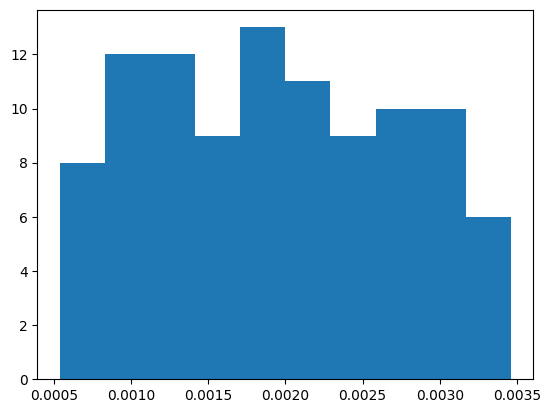

In [116]:
plt.hist(fluxes)

In [117]:
X.shape

(100,)

In [118]:
X

array([2.2556, 1.3761, 1.1364, 4.4776, 1.9108, 0.9464, 0.9804, 1.0309,
       1.4286, 1.5873, 0.9934, 1.3393, 2.6087, 1.7964, 1.1952, 2.6786,
       1.0601, 1.9608, 1.3575, 3.7037, 1.4634, 1.1719, 1.5707, 1.2146,
       1.1494, 1.0638, 1.3514, 2.7027, 0.9804, 2.027 , 1.0135, 1.5228,
       1.2712, 2.027 , 1.    , 1.7241, 5.5556, 3.1915, 3.1579, 1.2931,
       2.0548, 2.6549, 0.8955, 1.4423, 4.918 , 1.1194, 4.3478, 1.0714,
       1.0676, 1.1719, 1.3889, 1.6854, 0.9259, 1.1628, 0.9009, 1.1628,
       3.5294, 3.1579, 3.5714, 1.5707, 1.6393, 1.7964, 1.2195, 4.6154,
       3.125 , 2.1127, 1.0417, 1.3953, 0.9091, 1.0239, 1.7241, 3.2258,
       1.7544, 1.145 , 1.1236, 1.4354, 2.3622, 1.7442, 2.381 , 1.9481,
       1.0638, 2.459 , 2.2059, 2.2556, 3.2609, 3.5714, 0.8671, 2.521 ,
       0.9677, 1.31  , 2.5862, 2.6786, 3.8961, 1.6484, 1.7241, 4.4776,
       1.0239, 2.5641, 2.2222, 1.6949])

In [137]:
run_files = 'stopo temp_simple.cmd\n'
sed = "sed  -e 's/Clflux/'$Clflux'/g' -e 's/etch_time1/'$etch_time1'/g' -e 's/etch_time2/'$etch_time2'/g' -e 's/etch_time3/'$etch_time3'/g' -e 's/etch_time4/'$etch_time4'/g' -e 's/etch_time5/'$etch_time5'/g' simple.cmd > temp_simple.cmd\n"
text  = ''
for i in range(100):
    
    params = ''
    params += f'etch_time1={round(1*X[i],4)}\n'
    params += f'etch_time2={round(2*X[i],4)}\n'
    params += f'etch_time3={round(3*X[i],4)}\n'
    params += f'etch_time4={round(4*X[i],4)}\n'
    params += f'etch_time5={round(5*X[i],4)}\n'
    params += f'Clflux={fluxes[i]}\n'
    
    text+= f'mkdir -p Data_GAA/TDR_files/results_{fluxes[i]}\n'
    text+= f'mkdir -p Data_GAA/PMC_files/results_{fluxes[i]}\n'
    text+= 'export '
    text += params
    text += sed
    text += run_files
    

In [138]:
with open('/Users/nimitt/Documents/SRIP/SemiconductorFabricationGAA/DataGeneration/e.sh','w') as file:
    file.write(text)